In [1]:
import torch
from torch.autograd import Variable
from layers import SinkhornDistance
import matplotlib.pyplot as plt
from geomloss import SamplesLoss

In [2]:
num_points = 30

In [3]:
a = Variable(torch.zeros(2,num_points), requires_grad = True)
b = torch.zeros(a.size())
a.data[0][3:7] = 1
b.data[0][3:5] = 1
a.data[1][1:3] = 1
b.data[1][8:10] = 1

<Figure size 432x288 with 0 Axes>

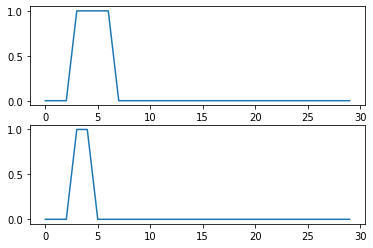

<Figure size 432x288 with 0 Axes>

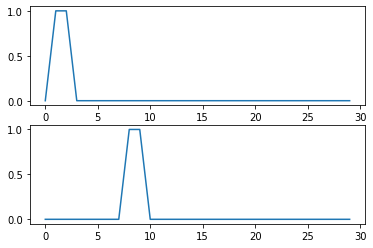

In [4]:
for i in range(len(a)):
    plt.figure()
    fig, ax = plt.subplots(2,1)
    ax[0].plot(a[i].detach().numpy())
    ax[1].plot(b[i].detach().numpy())

In [5]:
sinkhorn = SinkhornDistance(eps=1e-5, max_iter=100000, reduction=None)
sh_loss, P, C = sinkhorn(a,b)

In [6]:
sh_loss.backward()

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]])

<Figure size 432x288 with 0 Axes>

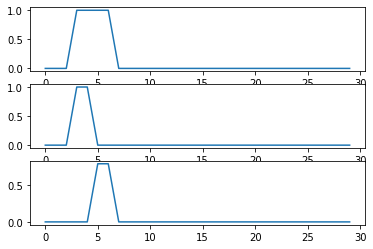

<Figure size 432x288 with 0 Axes>

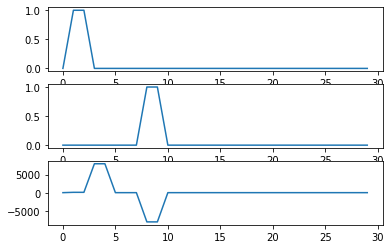

In [7]:
for i in range(len(a)):
    plt.figure()
    fig, ax = plt.subplots(3,1)
    ax[0].plot(a[i].detach().numpy())
    ax[1].plot(b[i].detach().numpy())
    ax[2].plot(a.grad[i].numpy())
a.grad.data.zero_()
# b.grad.data.zero_()

In [8]:
z = torch.rand(2,num_points)

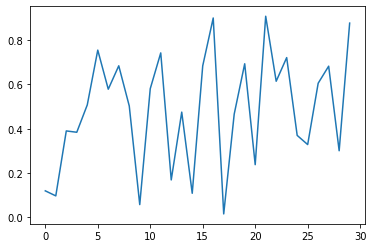

In [9]:
plt.plot(z.numpy()[0])

In [19]:
sample_loss = SamplesLoss(p=1, blur=0.01)

In [20]:
sl1 = sample_loss(a,b)

In [21]:
sl1.backward()

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]])

<Figure size 432x288 with 0 Axes>

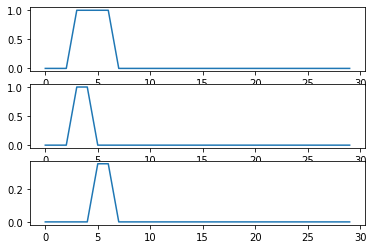

<Figure size 432x288 with 0 Axes>

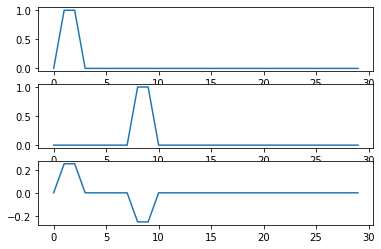

In [22]:
for i in range(len(a)):
    plt.figure()
    fig, ax = plt.subplots(3,1)
    ax[0].plot(a[i].detach().numpy())
    ax[1].plot(b[i].detach().numpy())
    ax[2].plot(a.grad[i].numpy())
a.grad.data.zero_()
# b.grad.data.zero_()

In [23]:
sl2 = sample_loss(a,z)
sl2.backward()

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]])

<Figure size 432x288 with 0 Axes>

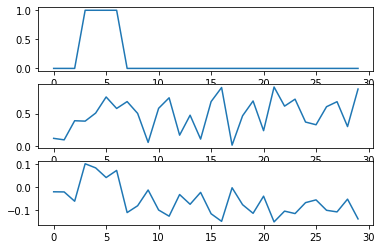

<Figure size 432x288 with 0 Axes>

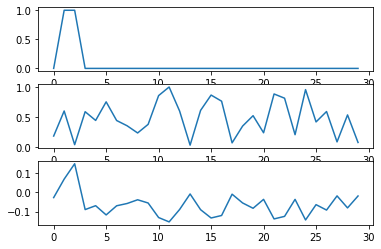

In [24]:
for i in range(len(a)):
    plt.figure()
    fig, ax = plt.subplots(3,1)
    ax[0].plot(a[i].detach().numpy())
    ax[1].plot(z[i].detach().numpy())
    ax[2].plot(a.grad[i].numpy())
a.grad.data.zero_()
# b.grad.data.zero_()

In [25]:
sl1, sl2

(tensor(1.7071, grad_fn=<SelectBackward>),
 tensor(3.0535, grad_fn=<SelectBackward>))

In [16]:
sh_loss

tensor(3.2006, grad_fn=<SumBackward2>)

In [17]:
sl1

tensor(1.5000, grad_fn=<SelectBackward>)

In [18]:
sl2

tensor(4.6715, grad_fn=<SelectBackward>)